In [1]:
import os 

kafka = "org.apache.spark:spark-sql-kafka-0-10_2.12:3.0.1"
mongo = "org.mongodb.spark:mongo-spark-connector_2.12:3.0.0"

os.environ["PYSPARK_PYTHON"]="python3.7"
os.environ["PYSPARK_DRIVER_PYTHON"]="python3.7"
os.environ["PYSPARK_SUBMIT_ARGS"] = ("--packages {0},{1} pyspark-shell".format(kafka, mongo))

In [2]:
from pyspark.sql import SparkSession, DataFrame
from pyspark.sql.functions import *
from pyspark.sql.types import *

spark = SparkSession \
        .builder \
        .master("spark://spark-master:7077") \
        .appName("Visualize") \
        .config("spark.mongodb.input.uri", "mongodb://172.16.0.6:27017/bigdata.application") \
        .config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12:3.0.0") \
        .getOrCreate()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = spark.read.format("mongo").load()

In [5]:
df.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- oid: string (nullable = true)
 |-- androidVersion: integer (nullable = true)
 |-- category: string (nullable = true)
 |-- contentRating: string (nullable = true)
 |-- currentVersion: integer (nullable = true)
 |-- installs: long (nullable = true)
 |-- lastUpdate: long (nullable = true)
 |-- negative: integer (nullable = true)
 |-- positive: integer (nullable = true)
 |-- price: double (nullable = true)
 |-- ratings: long (nullable = true)
 |-- reviews: long (nullable = true)
 |-- score: double (nullable = true)
 |-- size: integer (nullable = true)
 |-- title: string (nullable = true)



In [6]:
df = df.drop('_id')

In [7]:
df.show(5)

+--------------+-----------+-------------+--------------+--------+----------+--------+--------+-----+-------+-------+---------+----+--------------------+
|androidVersion|   category|contentRating|currentVersion|installs|lastUpdate|negative|positive|price|ratings|reviews|    score|size|               title|
+--------------+-----------+-------------+--------------+--------+----------+--------+--------+-----+-------+-------+---------+----+--------------------+
|            41|     Action| Everyone 10+|            13| 1000000|1591360064|       6|      34|  0.0|  11239|   4942| 4.317223|  79|Warplanes: WW1 Sk...|
|            41|     Action|         Teen|            98|  100000|1588036617|       7|      24|  0.0|    229|    123|     3.99|  43|Stickman Shooter ...|
|            41|     Casual|     Everyone|           144|10000000|1591961876|      10|      30|  0.0|  91336|  37794| 4.003923|  24|        My Baby Care|
|           403|  Education|     Everyone|            11|  100000|1484908313

In [8]:
df = df.withColumn('star', round(col("score")))

In [9]:
star_df = df.groupBy('star').count().sort("star", ascending=False)

In [10]:
star_df.show()

+----+-----+
|star|count|
+----+-----+
| 5.0|34064|
| 4.0|95531|
| 3.0|11650|
| 2.0| 2096|
| 1.0|  108|
+----+-----+



<AxesSubplot:title={'center':'Số bản ghi theo số sao'}, xlabel='star'>

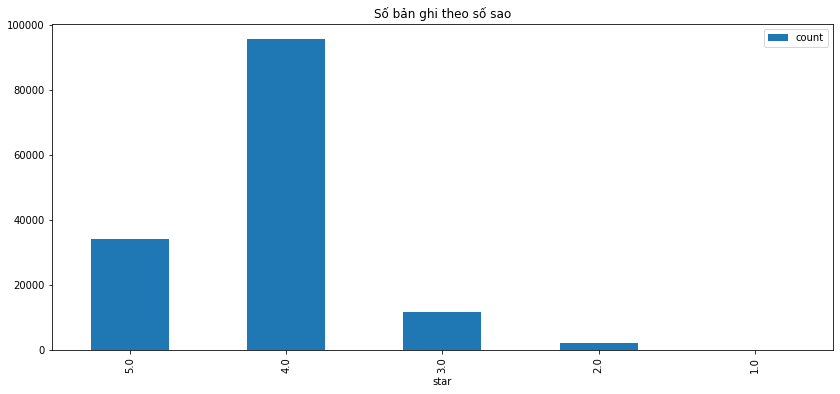

In [11]:
star_df.toPandas().plot.bar(x='star',figsize=(14, 6), title="Số bản ghi theo số sao")

<AxesSubplot:title={'center':'Số bản ghi theo số sao'}, ylabel='count'>

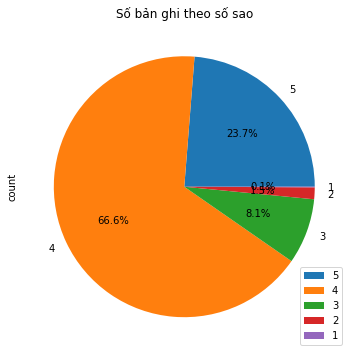

In [12]:
labels = [int(row.star) for row in star_df.select('star').collect()]
star_df.toPandas().plot.pie(labels=labels, y='count',figsize=(14, 6), autopct='%1.1f%%', title="Số bản ghi theo số sao")

<AxesSubplot:title={'center':'Sự tương quan giữa lượt tải và diểm đánh giá'}, xlabel='installs', ylabel='score'>

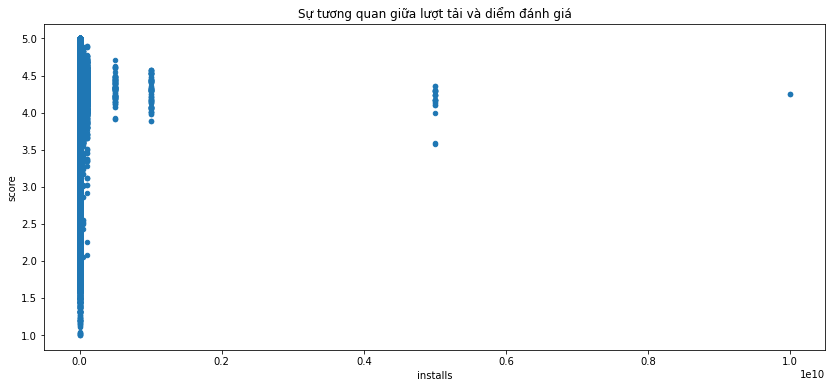

In [13]:
corr_score_install = df.select('score', 'installs')
corr_score_install.toPandas().plot.scatter(x='installs', y='score', figsize=(14, 6), title="Sự tương quan giữa lượt tải và diểm đánh giá")

<AxesSubplot:title={'center':'Sự tương quan giữa ratings và diểm đánh giá'}, xlabel='ratings', ylabel='score'>

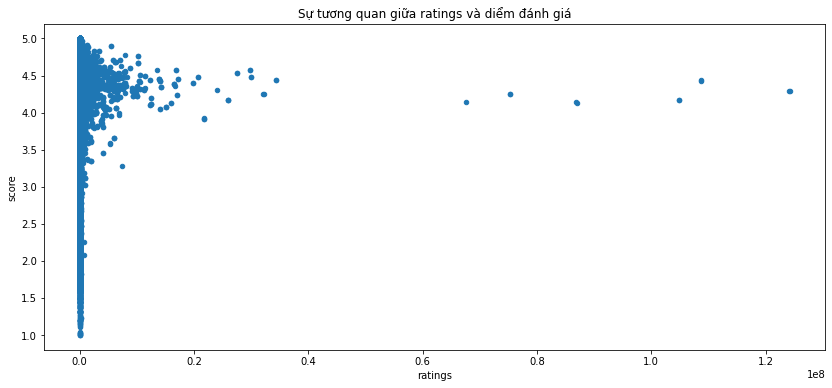

In [14]:
corr_score_ratings = df.select('score', 'ratings')
corr_score_ratings.toPandas().plot.scatter(x='ratings', y='score', figsize=(14, 6), title="Sự tương quan giữa ratings và diểm đánh giá")

<AxesSubplot:title={'center':'Sự tương quan giữa kích thước và diểm đánh giá'}, xlabel='size', ylabel='score'>

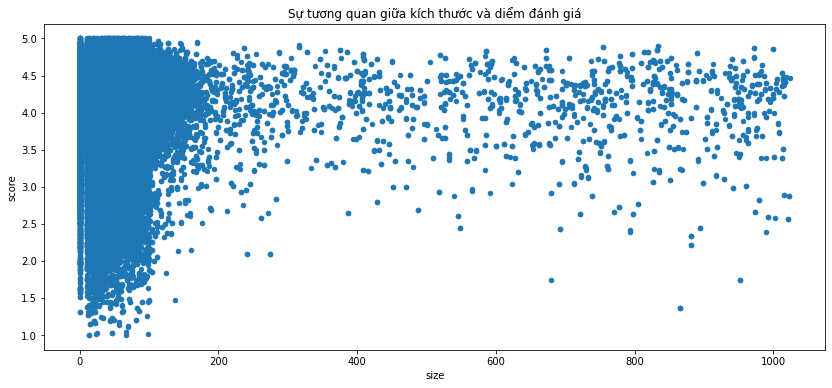

In [15]:
corr_score_size = df.select('score', 'size')
corr_score_size.toPandas().plot.scatter(x='size', y='score', figsize=(14, 6), title="Sự tương quan giữa kích thước và diểm đánh giá")

<AxesSubplot:title={'center':'Sự tương quan giữa lượt đánh giá tích cực và diểm đánh giá'}, xlabel='positive', ylabel='score'>

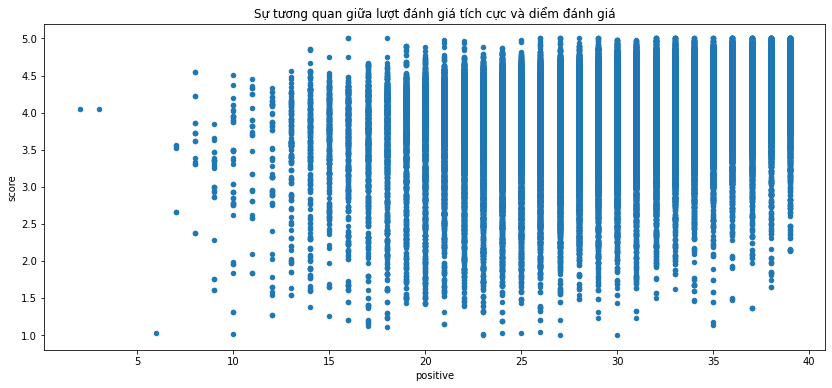

In [16]:
corr_score_positive = df.select('score', 'positive')
corr_score_positive.toPandas().plot.scatter(x='positive', y='score', figsize=(14, 6), title="Sự tương quan giữa lượt đánh giá tích cực và diểm đánh giá")

<AxesSubplot:title={'center':'Sự tương quan giữa lượt đánh giá tiêu cực và diểm đánh giá'}, xlabel='negative', ylabel='score'>

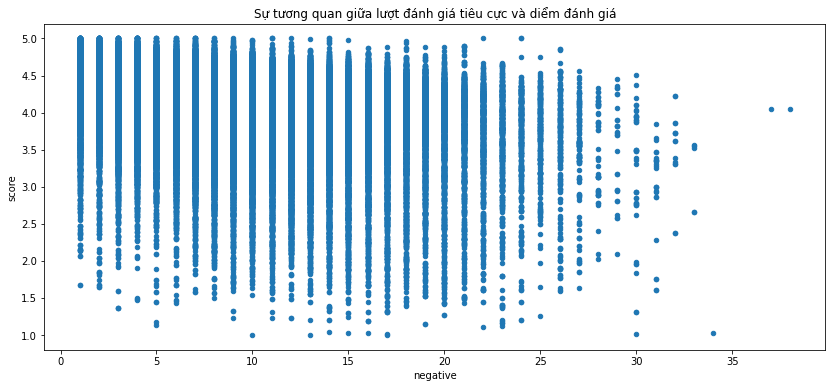

In [17]:
corr_score_negative = df.select('score', 'negative')
corr_score_negative.toPandas().plot.scatter(x='negative', y='score', figsize=(14, 6), title="Sự tương quan giữa lượt đánh giá tiêu cực và diểm đánh giá")

<AxesSubplot:title={'center':'Sự tương quan giữa giá tiền và diểm đánh giá'}, xlabel='price', ylabel='score'>

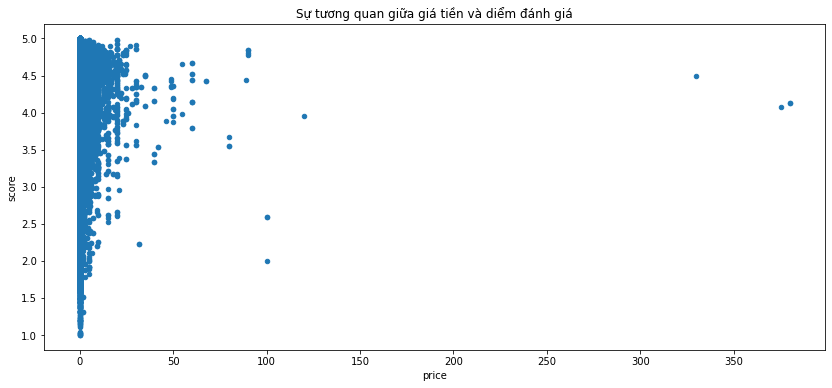

In [18]:
corr_score_price = df.select('score', 'price')
corr_score_price.toPandas().plot.scatter(x='price', y='score', figsize=(14, 6), title="Sự tương quan giữa giá tiền và diểm đánh giá")

<AxesSubplot:title={'center':'Sự tương quan giữa lượt reviews và diểm đánh giá'}, xlabel='reviews', ylabel='score'>

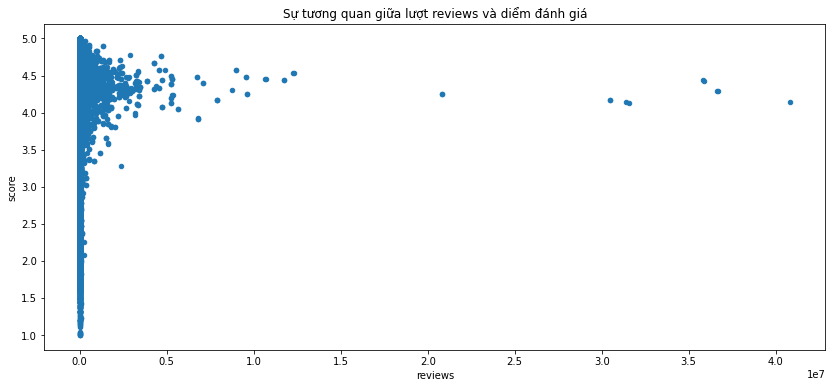

In [19]:
corr_score_reviews = df.select('score', 'reviews')
corr_score_reviews.toPandas().plot.scatter(x='reviews', y='score', figsize=(14, 6), title="Sự tương quan giữa lượt reviews và diểm đánh giá")